In [2]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_ppdc_donchi_strategy import (
    TSMyoPPDCDONCHIStrategy
)
from datetime import datetime

2020-03-18 11:36:04.556373	开始加载历史数据
2020-03-18 11:36:04.556373	加载进度： [1%]
2020-03-18 11:36:04.556373	加载进度： [2%]
2020-03-18 11:36:04.556373	加载进度： [2%]
2020-03-18 11:36:04.557373	加载进度： [3%]
2020-03-18 11:36:04.557373	加载进度： [4%]
2020-03-18 11:36:04.557373	加载进度： [5%]
2020-03-18 11:36:04.557373	加载进度： [6%]
2020-03-18 11:36:04.557373	加载进度： [7%]
2020-03-18 11:36:04.557373	加载进度： [7%]
2020-03-18 11:36:04.557373	加载进度： [8%]
2020-03-18 11:36:04.557373	加载进度： [9%]
2020-03-18 11:36:04.557373	加载进度： [10%]
2020-03-18 11:36:04.557373	加载进度：# [11%]
2020-03-18 11:36:04.557373	加载进度：# [12%]
2020-03-18 11:36:04.558374	加载进度：# [12%]
2020-03-18 11:36:04.558374	加载进度：# [13%]
2020-03-18 11:36:04.558374	加载进度：# [14%]
2020-03-18 11:36:04.558374	加载进度：# [15%]
2020-03-18 11:36:04.558374	加载进度：# [16%]
2020-03-18 11:36:04.558925	加载进度：# [16%]
2020-03-18 11:36:04.558925	加载进度：# [17%]
2020-03-18 11:36:04.558925	加载进度：# [18%]
2020-03-18 11:36:04.559375	加载进度：# [19%]
2020-03-18 11:36:04.559375	加载进度：# [20%]
2020-03-18 11:36:04.559375	

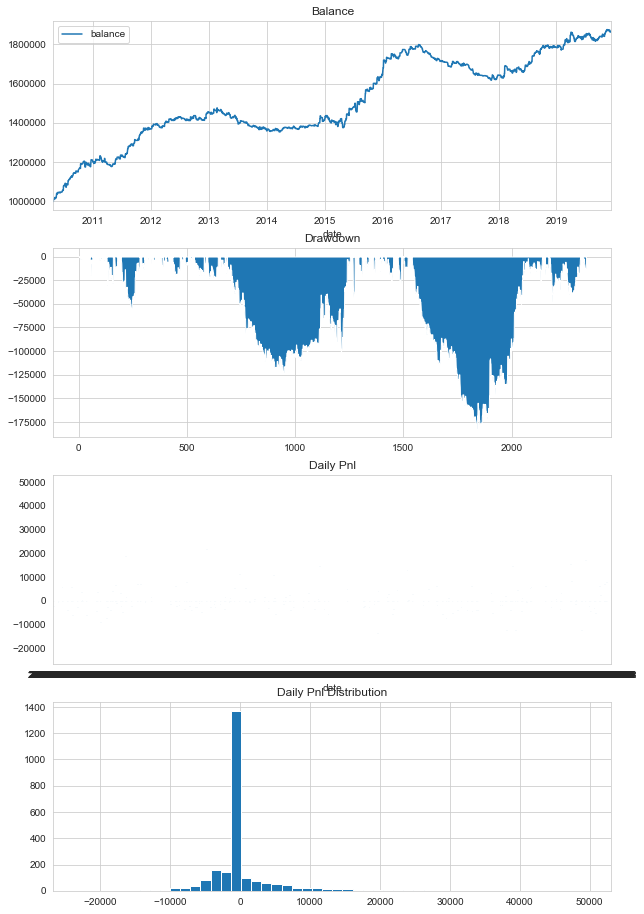

In [4]:
# PPDC 股指IF 滑点3跳
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoPPDCDONCHIStrategy,{'atr_stop': 6, 'atr_window': 50, 'don_len': 5})
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [3]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.1)
setting.add_parameter("atr_stop", 5, 8, 1)
setting.add_parameter("atr_window", 35, 55, 5)
setting.add_parameter("don_len", 5, 30, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 50, 'don_len': 5}, 目标：0.451780419192733
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 50, 'don_len': 10}, 目标：0.451780419192733
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 50, 'don_len': 15}, 目标：0.451780419192733
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 50, 'don_len': 20}, 目标：0.451780419192733
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 50, 'don_len': 25}, 目标：0.451780419192733
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 50, 'don_len': 30}, 目标：0.451780419192733
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 45, 'don_len': 5}, 目标：0.4414729005199604
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 45, 'don_len': 10}, 目标：0.4414729005199604
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 45, 'don_len': 15}, 目标：0.4414729005199604
2020-03-18 11:33:25.981143	参数：{'atr_stop': 6, 'atr_window': 45, 'don_len': 20}, 目标：0.44147

样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.1
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.45
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.45
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.65
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.75
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.75
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.1
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 1, 2, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35
样本内组合为(0, 1, 2, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.1
样本内组合为(0, 1, 2, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.95
样本内组合为(0, 1, 2, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.15
样本内组合为(0, 1, 2, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.1


样本内组合为(1, 2, 3, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 3, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5
样本内组合为(1, 2, 3, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.15
样本内组合为(1, 2, 3, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.55
样本内组合为(1, 2, 3, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 4, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.45
样本内组合为(1, 2, 4, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.45
样本内组合为(1, 2, 4, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35
样本内组合为(1, 2, 4, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7
样本内组合为(1, 2, 4, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35
样本内组合为(1, 2, 4, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.15
样本内组合为(1, 2, 4, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7
样本内组合为(1, 2, 4, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35
样本内组合为(1, 2, 4, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 4, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.75
样本内组合为(1, 2, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.3

0.48412698412698413

2020-08-09 11:10:48.591837	开始加载历史数据
2020-08-09 11:10:48.591837	加载进度： [2%]
2020-08-09 11:10:48.592838	加载进度： [4%]
2020-08-09 11:10:48.592838	加载进度： [5%]
2020-08-09 11:10:48.592838	加载进度： [7%]
2020-08-09 11:10:48.592838	加载进度： [9%]
2020-08-09 11:10:48.592838	加载进度：# [11%]
2020-08-09 11:10:48.592838	加载进度：# [12%]
2020-08-09 11:10:48.592838	加载进度：# [14%]
2020-08-09 11:10:48.592838	加载进度：# [16%]
2020-08-09 11:10:48.592838	加载进度：# [18%]
2020-08-09 11:10:48.592838	加载进度：# [20%]
2020-08-09 11:10:48.592838	加载进度：## [21%]
2020-08-09 11:10:48.592838	加载进度：## [23%]
2020-08-09 11:10:48.593840	加载进度：## [25%]
2020-08-09 11:10:48.593840	加载进度：## [27%]
2020-08-09 11:10:48.593840	加载进度：## [29%]
2020-08-09 11:10:48.593840	加载进度：### [30%]
2020-08-09 11:10:48.593840	加载进度：### [32%]
2020-08-09 11:10:48.593840	加载进度：### [34%]
2020-08-09 11:10:48.593840	加载进度：### [36%]
2020-08-09 11:10:48.593840	加载进度：### [37%]
2020-08-09 11:10:48.593840	加载进度：### [39%]
2020-08-09 11:10:48.594841	加载进度：#### [41%]
2020-08-09 11:10:48.594841	加载进度：##

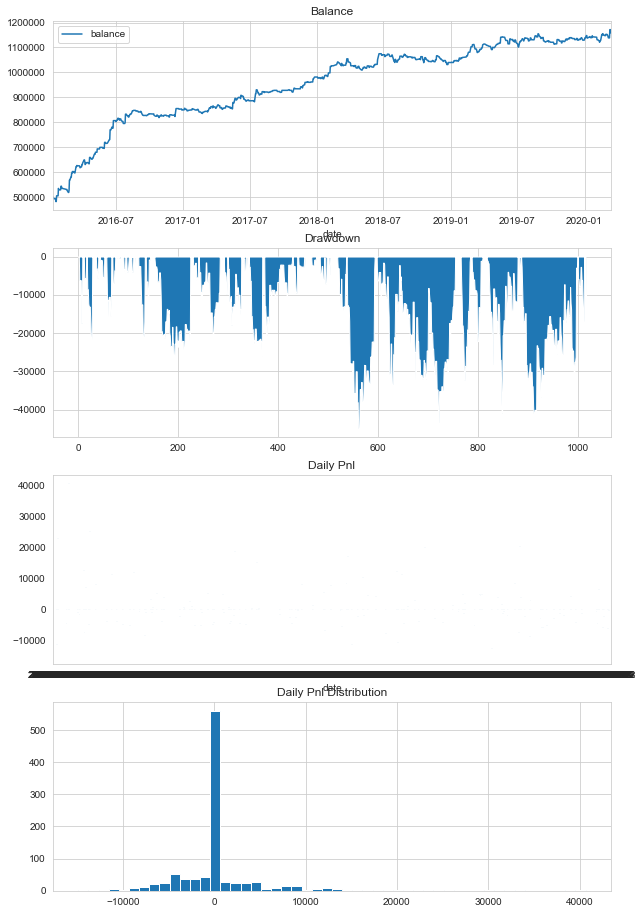

In [5]:
# PPDC 股指IC
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2020, 8, 8),
    rate=0.23/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=5_00_000,
)
engine.add_strategy(TSMyoPPDCDONCHIStrategy, {'atr_stop': 5, 'don_len': 5, 'atr_window': 60})
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [7]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.8, 0.1)
setting.add_parameter("atr_stop", 5, 8, 1)
setting.add_parameter("don_len", 5, 30, 5)
setting.add_parameter("atr_window", 30, 60, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-18 11:45:07.816661	参数：{'atr_stop': 5, 'don_len': 5, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 10, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 15, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 20, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 25, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 30, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 5, 'atr_window': 35}, 目标：1.2350785586176873
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 10, 'atr_window': 35}, 目标：1.2350785586176873
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 15, 'atr_window': 35}, 目标：1.2350785586176873
2020-03-18 11:45:07.817662	参数：{'atr_stop': 5, 'don_len': 20, 'atr_window': 35}, 目标：1

从总样本内（共10段）取5段数据组成样本内，共有252种取法
样本内组合为(0, 1, 2, 3, 4)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 1, 2, 3, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6071428571428571
样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.75
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.21428571428571427
样本内组合为(0, 1, 2, 5, 

样本内组合为(0, 3, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5714285714285714
样本内组合为(0, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.03571428571428571
样本内组合为(0, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(0, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.17857142857142858
样本内组合为(0, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.17857142857142858
样本内组合为(0, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(0, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.2857142857142857
样本内组合为(0, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.17857142857142858
样本内组合为(0, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.32142857142857145
样本内组合为(0, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.32142857142857145
样本内组合为(0, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4642857142857143
样本内组合为(0, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(0, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.3214285

样本内组合为(2, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.2857142857142857
样本内组合为(2, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5357142857142857
样本内组合为(2, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(2, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.42857142857142855
样本内组合为(2, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6428571428571429
样本内组合为(2, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(2, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.17857142857142858
样本内组合为(2, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.21428571428571427
样本内组合为(2, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.42857142857142855
样本内组合为(2, 5, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6785714285714286
样本内组合为(2, 6, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7142857142857143
样本内组合为(3, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(3, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.0714285714

0.7103174603174603

In [9]:
# 全样本优化 30 - 60
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("trailing_stop", 0.4, 0.8, 0.1)
setting.add_parameter("atr_stop", 4, 7, 1)
setting.add_parameter("don_len", 30, 60, 5)
setting.add_parameter("atr_window", 30, 60, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 30, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 35, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 40, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 45, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 50, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 55, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 60, 'atr_window': 60}, 目标：1.2364434393367625
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 30, 'atr_window': 35}, 目标：1.2350785586176873
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 35, 'atr_window': 35}, 目标：1.2350785586176873
2020-03-18 11:53:45.053523	参数：{'atr_stop': 5, 'don_len': 40, 'atr_window': 35}, 目标

样本内组合为(0, 1, 2, 3, 4)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 1, 2, 3, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35714285714285715
样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5714285714285714
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.25
样本内组合为(0, 1, 2, 5,

样本内组合为(0, 3, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4642857142857143
样本内组合为(0, 3, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5357142857142857
样本内组合为(0, 3, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(0, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(0, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(0, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(0, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.32142857142857145
样本内组合为(0, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4642857142857143
样本内组合为(0, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.32142857142857145
样本内组合为(0, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.39285714285714285
样本内组合为(0, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(0, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5
样本内组合

样本内组合为(2, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.17857142857142858
样本内组合为(2, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.21428571428571427
样本内组合为(2, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(2, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(2, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(2, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(2, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(2, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(2, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(2, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.07142857142857142
样本内组合为(2, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.10714285714285714
样本内组合为(2, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14285714285714285
样本内组合为(2, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.1428

0.7896825396825397

2020-03-18 00:11:55.253835	开始加载历史数据
2020-03-18 00:11:55.253835	加载进度： [1%]
2020-03-18 00:11:55.253835	加载进度： [2%]
2020-03-18 00:11:55.253835	加载进度： [2%]
2020-03-18 00:11:55.253835	加载进度： [3%]
2020-03-18 00:11:55.253835	加载进度： [4%]
2020-03-18 00:11:55.253835	加载进度： [5%]
2020-03-18 00:11:55.253835	加载进度： [6%]
2020-03-18 00:11:55.253835	加载进度： [7%]
2020-03-18 00:11:55.253835	加载进度： [7%]
2020-03-18 00:11:55.253835	加载进度： [8%]
2020-03-18 00:11:55.253835	加载进度： [9%]
2020-03-18 00:11:55.253835	加载进度： [10%]
2020-03-18 00:11:55.253835	加载进度：# [11%]
2020-03-18 00:11:55.253835	加载进度：# [12%]
2020-03-18 00:11:55.253835	加载进度：# [12%]
2020-03-18 00:11:55.253835	加载进度：# [13%]
2020-03-18 00:11:55.253835	加载进度：# [14%]
2020-03-18 00:11:55.253835	加载进度：# [15%]
2020-03-18 00:11:55.253835	加载进度：# [16%]
2020-03-18 00:11:55.253835	加载进度：# [16%]
2020-03-18 00:11:55.253835	加载进度：# [17%]
2020-03-18 00:11:55.253835	加载进度：# [18%]
2020-03-18 00:11:55.253835	加载进度：# [19%]
2020-03-18 00:11:55.253835	加载进度：# [20%]
2020-03-18 00:11:55.253835	

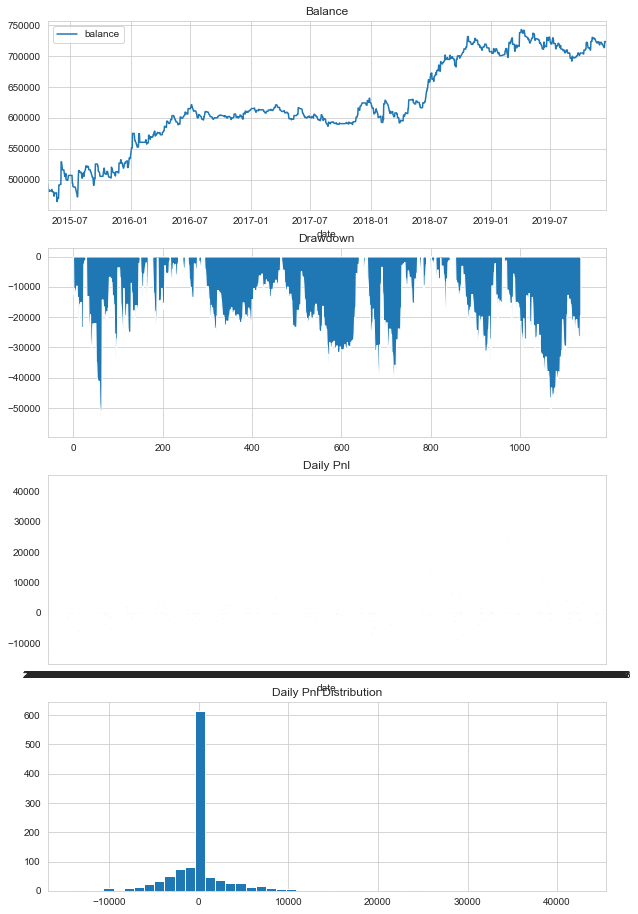

In [10]:
# PPDC IH
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=300,
    pricetick=0.2,
    capital=500000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 40})
#engine.run_optimization(setting)
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [9]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 0.4, 0.7, 0.1)
setting.add_parameter("atr_stop", 4, 6, 1)
setting.add_parameter("atr_window", 20, 50, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-18 00:11:08.910750	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 40}, 目标：0.35998161564402137
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 50}, 目标：0.3479959140965998
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 20}, 目标：0.32714436112362344
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 35}, 目标：0.32543450141207925
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 45}, 目标：0.30995223594948806
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 25}, 目标：0.28071911573182046
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 30}, 目标：0.2749962048944598
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.6, 'atr_stop': 6, 'atr_window': 40}, 目标：0.2633162311542718
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.6, 'atr_stop': 6, 'atr_window': 50}, 目标：0.22763318183518386
2020-03-18 00

从总样本内（共10段）取5段数据组成样本内，共有252种取法
样本内组合为(0, 1, 2, 3, 4)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9404761904761905
样本内组合为(0, 1, 2, 3, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9166666666666666
样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8690476190476191
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8690476190476191
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8928571428571429
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8571428571428571
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8333333333333334
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8214285714285714
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8690476190476191
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8809523809523809
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8571428571428571
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1

样本内组合为(0, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9880952380952381
样本内组合为(0, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9285714285714286
样本内组合为(0, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8809523809523809
样本内组合为(0, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9404761904761905
样本内组合为(0, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9761904761904762
样本内组合为(0, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9880952380952381
样本内组合为(0, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9404761904761905
样本内组合为(0, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9761904761904762
样本内组合为(0, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9642857142857143
样本内组合为(0, 5, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8809523809523809
样本内组合为(0, 6, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,

0.05952380952380952

In [ ]:
# PPDC 螺纹
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="RU9999.SHFE",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=1/10000,
    slippage=15,
    size=10,
    pricetick=5,
    capital=500000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {})
#engine.run_optimization(setting)
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2020-03-18 00:13:29.965974	开始加载历史数据
2020-03-18 00:13:29.971510	加载进度： [1%]
2020-03-18 00:13:29.972509	加载进度： [2%]
2020-03-18 00:13:29.974511	加载进度： [2%]
2020-03-18 00:13:29.975512	加载进度： [3%]
2020-03-18 00:13:29.976514	加载进度： [4%]
2020-03-18 00:13:29.976514	加载进度： [5%]
2020-03-18 00:13:29.977515	加载进度： [6%]
2020-03-18 00:13:29.978514	加载进度： [7%]
2020-03-18 00:13:29.979516	加载进度： [7%]
2020-03-18 00:13:29.980517	加载进度： [8%]
2020-03-18 00:13:29.981518	加载进度： [9%]
2020-03-18 00:13:29.982518	加载进度： [10%]
2020-03-18 00:13:29.983519	加载进度：# [11%]
2020-03-18 00:13:29.984520	加载进度：# [12%]
2020-03-18 00:13:29.985521	加载进度：# [12%]
2020-03-18 00:13:29.986522	加载进度：# [13%]
2020-03-18 00:13:29.986522	加载进度：# [14%]
2020-03-18 00:13:29.987523	加载进度：# [15%]
2020-03-18 00:13:29.988524	加载进度：# [16%]
2020-03-18 00:13:29.989524	加载进度：# [16%]
2020-03-18 00:13:29.990525	加载进度：# [17%]
2020-03-18 00:13:29.991526	加载进度：# [18%]
2020-03-18 00:13:29.992527	加载进度：# [19%]
2020-03-18 00:13:29.992527	加载进度：# [20%]
2020-03-18 00:13:29.993528	

In [15]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 1.8, 2.2, 0.2)
setting.add_parameter("atr_stop", 6,12 , 3)
setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.4658091168432947
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.4705092530775064
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 35}, 目标：-2.4776581676497043
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 30}, 目标：-2.481952067940646
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.4938056033937333
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.4956983661276095
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 35}, 目标：-2.5078045797501343
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 30}, 目标：-2.511179009193472
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 9, 'atr_window': 40}, 目标：-2.5124948682024515
2020

样本内组合为(0, 1, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5111111111111111
样本内组合为(0, 1, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5111111111111111
样本内组合为(0, 1, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5333333333333333
样本内组合为(0, 1, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4888888888888889
样本内组合为(0, 1, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6666666666666666
样本内组合为(0, 1, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5777777777777777
样本内组合为(0, 1, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6222222222222222
样本内组合为(0, 1, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4666666666666667
样本内组合为(0, 1, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4444444444444444
样本内组合为(0, 1, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5555555555555556
样本内组合为(0, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5111111111111111
样本内组合为(0, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4888888888888889
样本内组合为(0, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6222222222222222

样本内组合为(1, 2, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5555555555555556
样本内组合为(1, 2, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5333333333333333
样本内组合为(1, 2, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.37777777777777777
样本内组合为(1, 2, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 3, 4, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6222222222222222
样本内组合为(1, 3, 4, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5777777777777777
样本内组合为(1, 3, 4, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(1, 3, 4, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6666666666666666
样本内组合为(1, 3, 4, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5777777777777777
样本内组合为(1, 3, 4, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(1, 3, 4, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35555555555555557
样本内组合为(1, 3, 4, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.688888888888

0.3531746031746032

2020-03-16 09:53:36.456522	开始加载历史数据
2020-03-16 09:53:36.456522	加载进度： [1%]
2020-03-16 09:53:36.456522	加载进度： [2%]
2020-03-16 09:53:36.456522	加载进度： [2%]
2020-03-16 09:53:36.456522	加载进度： [3%]
2020-03-16 09:53:36.456522	加载进度： [4%]
2020-03-16 09:53:36.456522	加载进度： [5%]
2020-03-16 09:53:36.456522	加载进度： [6%]
2020-03-16 09:53:36.456522	加载进度： [7%]
2020-03-16 09:53:36.456522	加载进度： [7%]
2020-03-16 09:53:36.456522	加载进度： [8%]
2020-03-16 09:53:36.456522	加载进度： [9%]
2020-03-16 09:53:36.456522	加载进度： [10%]
2020-03-16 09:53:36.472150	加载进度：# [11%]
2020-03-16 09:53:36.472150	加载进度：# [12%]
2020-03-16 09:53:36.472150	加载进度：# [12%]
2020-03-16 09:53:36.472150	加载进度：# [13%]
2020-03-16 09:53:36.472150	加载进度：# [14%]
2020-03-16 09:53:36.472150	加载进度：# [15%]
2020-03-16 09:53:36.472150	加载进度：# [16%]
2020-03-16 09:53:36.472150	加载进度：# [16%]
2020-03-16 09:53:36.472150	加载进度：# [17%]
2020-03-16 09:53:36.472150	加载进度：# [18%]
2020-03-16 09:53:36.472150	加载进度：# [19%]
2020-03-16 09:53:36.472150	加载进度：# [20%]
2020-03-16 09:53:36.472150	

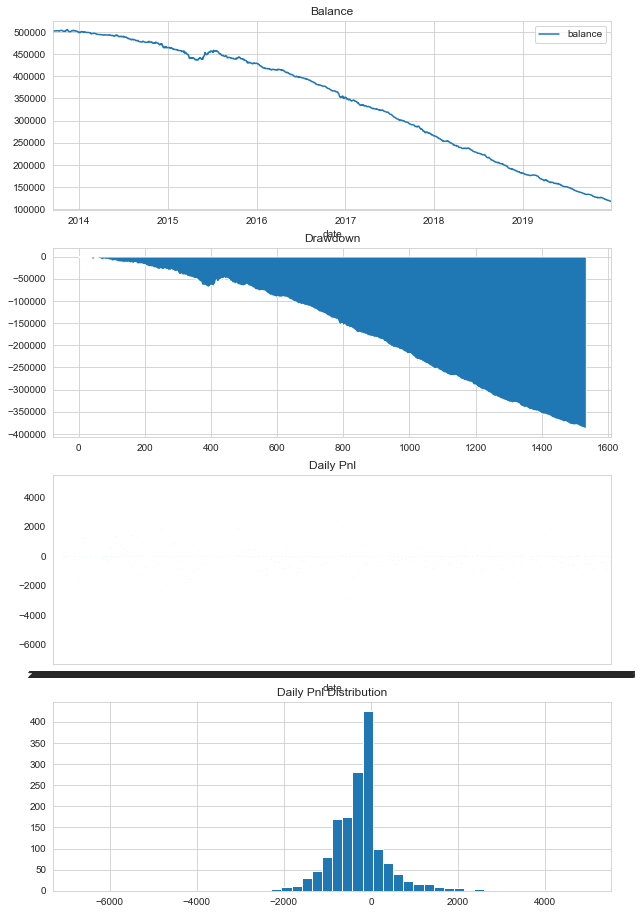

In [16]:
# PPDC 五债
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="TF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=3/1000000,
    slippage=0.005,
    size=10000,
    pricetick=0.005,
    capital=500000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {'trailing_stop': 0.7})
#engine.run_optimization(setting)
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [17]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 1.8, 2.2, 0.2)
setting.add_parameter("atr_stop", 6,12 , 3)
setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-17 21:58:48.084770	参数：{'trailing_stop': 1.8, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.5875909444776544
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.5875909444776544
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.5875909444776544
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 1.8, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.6058455033102885
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.6058455033102885
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.6058455033102885
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 1.8, 'atr_stop': 12, 'atr_window': 40}, 目标：-2.6453552553195783
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 40}, 目标：-2.6453552553195783
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 40}, 目标：-2.6453552553195783
2

样本内组合为(0, 1, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(0, 1, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(0, 1, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(0, 1, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(0, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(0, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(0, 2, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(0, 2, 3, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8666666666666667
样本内组合为(0, 2, 3, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(0, 2, 3, 5, 9)时，样本内最优参数在样本外相对排名 W （

样本内组合为(1, 3, 4, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8666666666666667
样本内组合为(1, 3, 4, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(1, 3, 4, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(1, 3, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(1, 3, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(1, 3, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(1, 3, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （

0.0